In [133]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np
import pandas as pd
import cv2 as cv

In [134]:
(X_train, y_train),(X_test, y_test)=keras.datasets.mnist.load_data()
#a=keras.datasets.mnist.load_data()

In [135]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [136]:
#print((X_train))
#print(list(y_train))
#print((X_test))
#print((y_test))

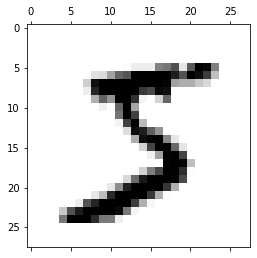

In [137]:
plt.matshow(X_train[0], cmap="binary")

In [138]:
# Normalize the train dataset
X_train = tf.keras.utils.normalize(X_train, axis=1)
# Normalize the test dataset
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [139]:
#Build the model object
model = tf.keras.models.Sequential()
# Add the Flatten Layer
model.add(tf.keras.layers.Flatten())
# Build the input and the hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Build the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [140]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [141]:
model.fit(x=X_train, y=y_train, epochs=20) # Start training process

Epoch 1/20
1875/1875 [==============================] - 39s 6ms/step - loss: 0.2671 - accuracy: 0.9215
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1095 - accuracy: 0.9664
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0752 - accuracy: 0.9767 1s - loss: 0.0755 - accuracy - ETA: 0s -
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0562 - accuracy: 0.9819
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0448 - accuracy: 0.9854 0s - loss: 0.0445 - 
Epoch 6/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0337 - accuracy: 0.9891 3s - loss: 0.032 - ETA: 1s - loss: 0.0331 
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0269 - accuracy: 0.9906 0s - los
Epoch 8/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0226 - accuracy: 0.9923
Epoch 9/20
1875/1875 [==============================] - 10s 5m

In [142]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=X_test, y=y_test)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.1499 - accuracy: 0.9764

Test accuracy: 0.9764000177383423


In [143]:
predictions = model.predict([X_test]) # Make prediction

Consider rewriting this model with the Functional API.


In [144]:
print(np.argmax(predictions[1000])) # Print out the number

9


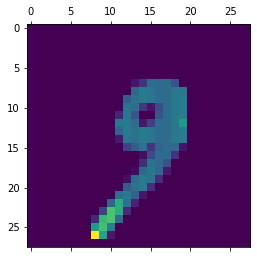

In [145]:
plt.matshow(X_test[1000])

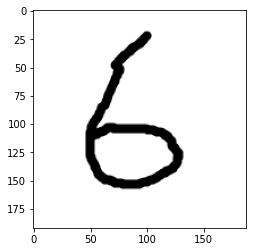

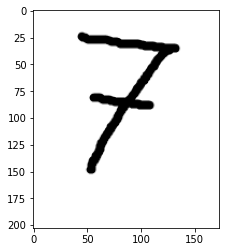

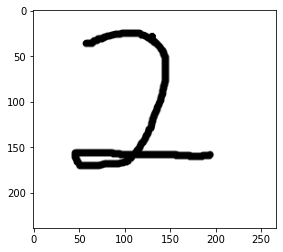

In [146]:
img_6 =  cv.imread("6.png")
img_7 =  cv.imread("7.png")
img_2 =  cv.imread("2.png")
list_of_images=[img_6, img_7,img_2]
plt.imshow(img_6)
plt.show()
plt.imshow(img_7)
plt.show()
plt.imshow(img_2)

plt.show()

In [147]:
print(img_6.shape)
print(X_train[0].shape)


(192, 188, 3)
(28, 28)


(192, 188, 3) original image
(28, 28) after gray image


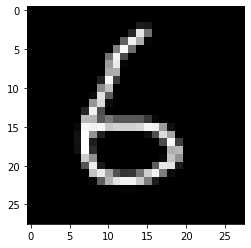

(1, 28, 28) after invert
(784, 1) after reshape
(1, 784, 1) after expand
prediction= 6
(203, 173, 3) original image
(28, 28) after gray image


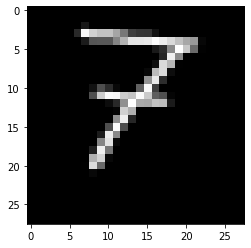

(1, 28, 28) after invert
(784, 1) after reshape
(1, 784, 1) after expand
prediction= 2
(239, 267, 3) original image
(28, 28) after gray image


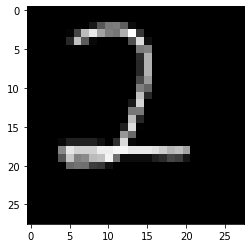

(1, 28, 28) after invert
(784, 1) after reshape
(1, 784, 1) after expand
prediction= 2


In [148]:
from tensorflow.keras.preprocessing import image

for i in list_of_images:
    img =  i 
    print(img.shape, 'original image')

    img=cv.resize(img, X_train[0].shape, interpolation = cv.INTER_AREA) # now its in shape (28, 28, 3) which is~ 2352(28x28x3)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # now gray image
    
    print(img.shape, 'after gray image')
    
    plt.imshow(img, cmap='binary')
    plt.show()
    
    #img=image.img_to_array(img)
    img=np.invert(np.array([img]))
    print(img.shape, 'after invert')
    
    img= img.flatten()
   
    img=np.reshape(img, ( 784, 1))
    print(img.shape, 'after reshape')

    img=np.expand_dims(img, axis=0) # switch to (1,784)
    print(img.shape, 'after expand')
    
    prediction=model.predict(img) # predict
    print ('prediction=',np.argmax(prediction))
